In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cannula_data.csv')

In [3]:
df.head()

,No.,Order No.,Article No.,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,1,14389927,15323759,360.4,107.4,385.6,387.7,1
1,2,14389217,15325226,384.7,102.6,387.3,390.7,1
2,3,14389820,15325218,391.1,99.2,375.6,391.0,1
3,4,14388649,15325220,383.8,106.6,387.7,394.1,1
4,5,14388570,15325218,392.6,115.0,396.8,396.0,1


In [4]:
df.drop(['No.', 'Order No.', 'Article No. '], axis=1, inplace=True)

In [5]:
df.head()

,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,360.4,107.4,385.6,387.7,1
1,384.7,102.6,387.3,390.7,1
2,391.1,99.2,375.6,391.0,1
3,383.8,106.6,387.7,394.1,1
4,392.6,115.0,396.8,396.0,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [7]:
X = df['Bright Annealing'].values.reshape(-1,1)
Y = df['Distorted or Not'].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [10]:
Y_pred = model.predict(X_test)

print("Accuracy", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



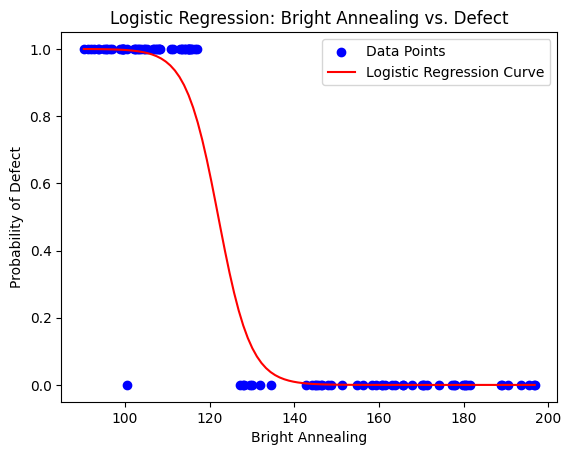

In [11]:
plt.scatter(X, Y, color='blue', label='Data Points')

X_curve = np.linspace(min(X), max(X), 100).reshape(-1,1)
Y_curve = model.predict_proba(X_curve)[:,1]

plt.plot(X_curve, Y_curve, color='red', label='Logistic Regression Curve')
plt.xlabel('Bright Annealing')
plt.ylabel('Probability of Defect')
plt.legend()
plt.title('Logistic Regression: Bright Annealing vs. Defect')
plt.show()